In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import wilcoxon, shapiro
import kagglehub
import seaborn as sns
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt

1. Učitavanje Podataka

In [ ]:
# Download latest version
path = kagglehub.dataset_download("jakubkhalponiak/phones-2024")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'phones-2024' dataset.
Path to dataset files: /kaggle/input/phones-2024


In [16]:
df=pd.read_csv("/kaggle/input/phones-2024/processed_data2.csv")
print(df.head())

  phone_brand              phone_model      store  price_usd  storage  ram  \
0       apple      Apple iPhone 16 Pro  Amazon DE    1357.55      256    8   
1       apple      Apple iPhone 16 Pro  Amazon DE    1492.55      512    8   
2       apple      Apple iPhone 16 Pro  Amazon DE    1705.32     1000    8   
3       apple  Apple iPhone 16 Pro Max  Amazon DE    1564.92      512    8   
4       apple     Apple iPhone 12 mini  Amazon DE     247.32      128    4   

  launch_date                                     dimensions  weight  \
0  2024-09-20  149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in)   199.0   
1  2024-09-20  149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in)   199.0   
2  2024-09-20  149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in)   199.0   
3  2024-09-20    163 x 77.6 x 8.3 mm (6.42 x 3.06 x 0.33 in)   227.0   
4  2020-11-13  131.5 x 64.2 x 7.4 mm (5.18 x 2.53 x 0.29 in)   135.0   

                                        display_type  ...   price_range  \
0  LTPO Super Retina XD

In [17]:
#provjeravanje i uklanjanje nepostojecih vrijednosti
print("\nNepostojece vrijednosti:\n",df.isnull().sum());


Nepostojece vrijednosti:
 phone_brand            0
phone_model            0
store                  0
price_usd              0
storage                0
ram                    0
launch_date            0
dimensions             0
weight                 0
display_type           0
display_size           0
display_resolution     0
os                     0
nfc                    0
usb                    0
battery                0
features_sensors       0
colors                 0
video                  0
chipset                0
cpu                    0
gpu                    0
year                   0
foldable               0
ppi_density            0
quantile_10            0
quantile_50            0
quantile_90            0
price_range            0
os_type                0
os_version             0
battery_size           0
colors_available       0
chip_company           0
cpu_core              18
gpu_company           71
fingerprint            0
video_resolution       0
dtype: int64


In [18]:
df=df.dropna()
print("\nNepostojece vrijednosti:\n",df.isnull().sum());


Nepostojece vrijednosti:
 phone_brand           0
phone_model           0
store                 0
price_usd             0
storage               0
ram                   0
launch_date           0
dimensions            0
weight                0
display_type          0
display_size          0
display_resolution    0
os                    0
nfc                   0
usb                   0
battery               0
features_sensors      0
colors                0
video                 0
chipset               0
cpu                   0
gpu                   0
year                  0
foldable              0
ppi_density           0
quantile_10           0
quantile_50           0
quantile_90           0
price_range           0
os_type               0
os_version            0
battery_size          0
colors_available      0
chip_company          0
cpu_core              0
gpu_company           0
fingerprint           0
video_resolution      0
dtype: int64


In [19]:
#uklonite duplicirane redove
df=df.drop_duplicates()

2 Eksplorativna analiza podataka (EDA)

In [20]:
#Pregledajte prvih nekoliko redaka podataka, statistički sažetak i provjerite
#jedinstvene vrijednosti
print("\nIspis prvih 5 redova:\n",df.head()) #ispis prvih 5 redova
print("\nStatisticki sazetak:\n",df.describe()) #ispis statistike za cijeli skup podataka
print("\nJedinstvene vrijednosti:\n",df.nunique()) #ispis jedinstvenih vrijednosti


Ispis prvih 5 redova:
   phone_brand              phone_model      store  price_usd  storage  ram  \
0       apple      Apple iPhone 16 Pro  Amazon DE    1357.55      256    8   
1       apple      Apple iPhone 16 Pro  Amazon DE    1492.55      512    8   
2       apple      Apple iPhone 16 Pro  Amazon DE    1705.32     1000    8   
3       apple  Apple iPhone 16 Pro Max  Amazon DE    1564.92      512    8   
4       apple     Apple iPhone 12 mini  Amazon DE     247.32      128    4   

  launch_date                                     dimensions  weight  \
0  2024-09-20  149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in)   199.0   
1  2024-09-20  149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in)   199.0   
2  2024-09-20  149.6 x 71.5 x 8.3 mm (5.89 x 2.81 x 0.33 in)   199.0   
3  2024-09-20    163 x 77.6 x 8.3 mm (6.42 x 3.06 x 0.33 in)   227.0   
4  2020-11-13  131.5 x 64.2 x 7.4 mm (5.18 x 2.53 x 0.29 in)   135.0   

                                        display_type  ...   price_range  \

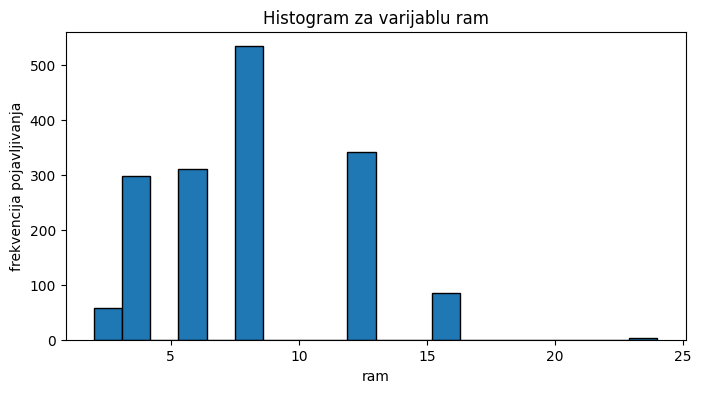

In [22]:
#Koristite vizualizacije za uočavanje odnosa između varijabli, analizirajte
#distribuciju, analizirajte outliere i distribuciju kategorijskih varijabli
#histogram ram
plt.figure(figsize=(8, 4))
plt.hist(df['ram'],bins=20, edgecolor='black')
plt.title(f"Histogram za varijablu ram")
plt.xlabel("ram")
plt.ylabel("frekvencija pojavljivanja")
plt.show()

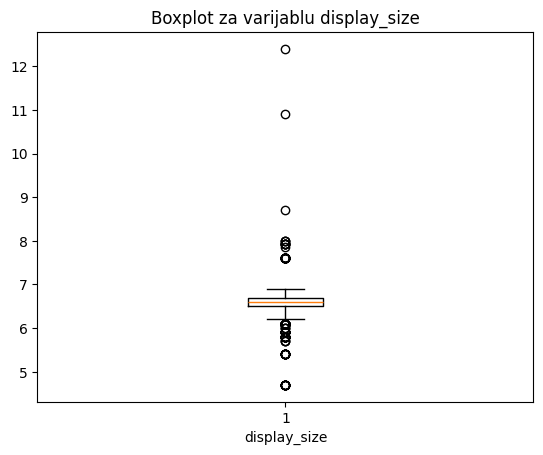

In [23]:
#boxplot za display_size varijablu
plt.figure()
plt.boxplot(x=df['display_size'])
plt.title(f"Boxplot za varijablu display_size")
plt.xlabel("display_size")
plt.show()


Korelacijska matrica: 

                   price_usd   storage       ram    weight  display_size  \
price_usd          1.000000  0.670949  0.547335  0.340780      0.267398   
storage            0.670949  1.000000  0.536552  0.292331      0.176939   
ram                0.547335  0.536552  1.000000  0.259175      0.339367   
weight             0.340780  0.292331  0.259175  1.000000      0.754789   
display_size       0.267398  0.176939  0.339367  0.754789      1.000000   
nfc                0.209244  0.218607  0.267170 -0.058391     -0.084925   
battery           -0.110264 -0.156563  0.209349  0.435252      0.608128   
foldable           0.415469  0.292627  0.222376  0.259350      0.408518   
ppi_density        0.390989  0.438372  0.461555 -0.026092     -0.108455   
quantile_10        0.286820  0.284165  0.321247  0.053392      0.104280   
quantile_50        0.369397  0.341877  0.430064  0.102594      0.217316   
quantile_90        0.373636  0.322252  0.433301  0.123737      0.279838   

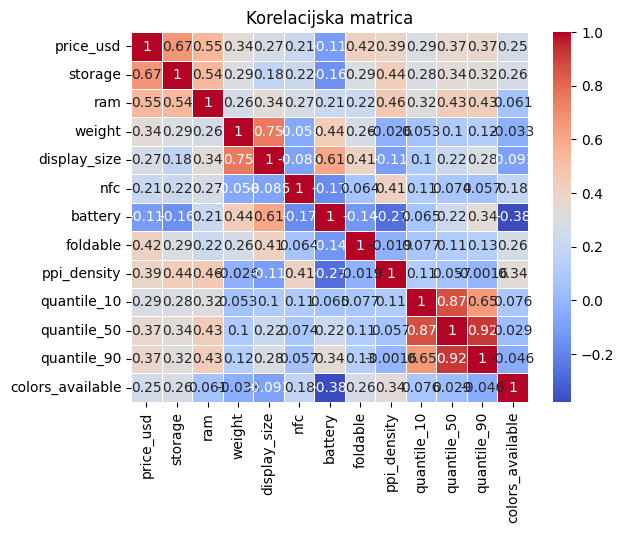

In [24]:
#correlation matrix za varijable ram i display_size
print("\nKorelacijska matrica: ")
corr_matrix=df.select_dtypes(include=['float64','int64']).corr()
print("\n",corr_matrix,"\n")

#korelacijska sa figure => 1 govori da se povecanjem jedne jednako povecava i druga varijabla,
#-1 da se povecanjem jedne jednako SMANJUJE druga varijabla
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelacijska matrica')
plt.show()

3. Deskriptivna statistika

In [25]:
#Izračunajte I interpretirajte i prikažite mjere središnje tedencije, mjere disperzije,
#mjere oblika
#mjere centralne tendencije
print(f"\nProsjek cijene u USD: ",df['price_usd'].mean())#prosjek
print(f"\nMedijan cijene u USD: ",df['price_usd'].median()) #medijan
#mjere disperzije
print(f"\nMinimalna vrijednost cijene u USD: ",df['price_usd'].min()) #minimalna vrijednost
print(f"\nMaksimalna vrijednost cijene u USD: ",df['price_usd'].max()) #maksimalna vrijednost
print(f"\nStandardna devijacija cijene u USD: ",df['price_usd'].std()) #standardna devijacija


Prosjek cijene u USD:  419.7926965601966

Medijan cijene u USD:  278.32

Minimalna vrijednost cijene u USD:  52.63

Maksimalna vrijednost cijene u USD:  2353.82

Standardna devijacija cijene u USD:  362.6197825051497


In [26]:
#mjere oblika
#skewness i kurtosis za varijable price_usd i storage
for column in df.columns[3:4]:
    print(f"\nAnaliza za varijablu {column}")
    print(f"\nSkewness: {skew(df[column])}")
    print(f"\nKurtosis: {kurtosis(df[column])}")


Analiza za varijablu price_usd

Skewness: 1.8354559666831356

Kurtosis: 3.8355313654074568


4. Vizualizacija

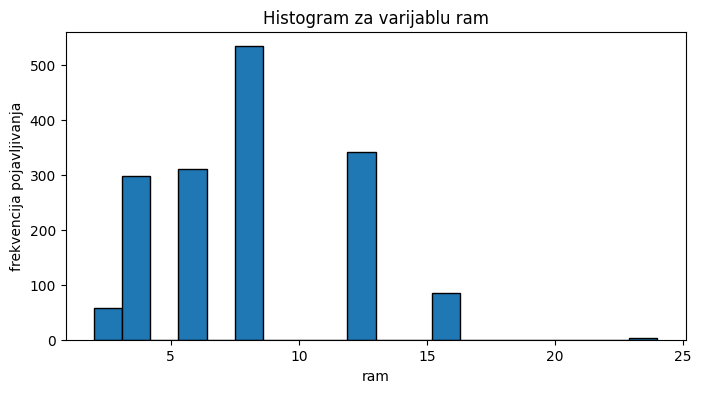

In [27]:
#Prikladno korišteni grafikoni za odabrane varijable (3-4 varijable, barem 3
#vizalizacije) i interpretirajte distribuciju. Jasno označene osi i naslovi, grafovi
#podržavaju interpretaciju

#histogram za varijablu ram
plt.figure(figsize=(8, 4))
plt.hist(df['ram'],bins=20, edgecolor='black')
plt.title(f"Histogram za varijablu ram")
plt.xlabel("ram")
plt.ylabel("frekvencija pojavljivanja")
plt.show()

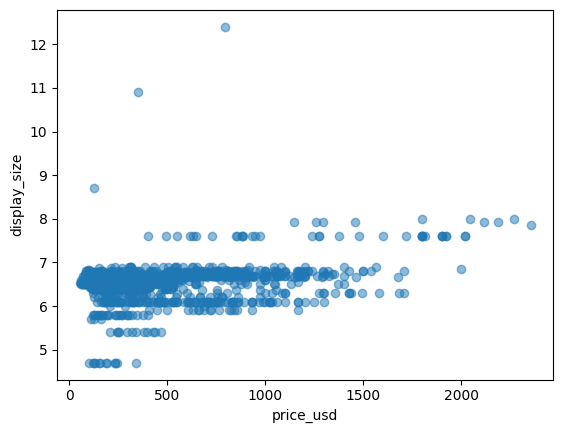

In [28]:
#scatter plot za varijable price_usd i display_size
plt.figure()
plt.scatter(df['price_usd'], df['display_size'], alpha=0.5)
plt.xlabel("price_usd")
plt.ylabel("display_size")
plt.show()

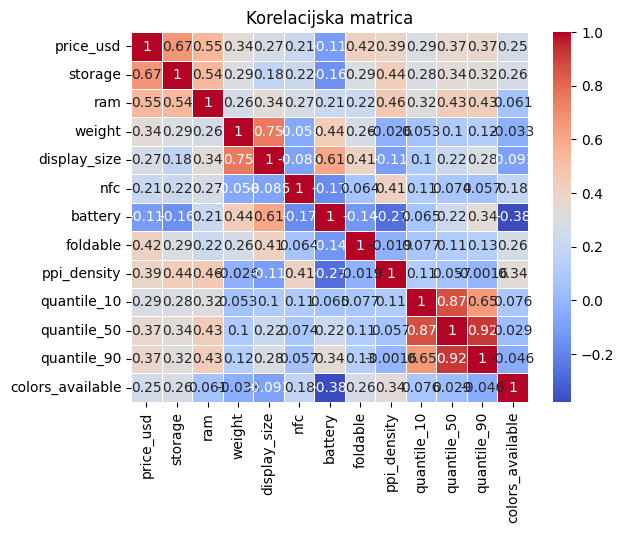

In [29]:
corr_matrix=df.select_dtypes(include=['float64','int64']).corr()

#korelacijska sa figure => 1 govori da se povecanjem jedne jednako povecava i druga varijabla,
#-1 da se povecanjem jedne jednako SMANJUJE druga varijabla
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelacijska matrica')
plt.show()